In [1]:
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
ext = '0.4.0-oneiric1_amd64.deb -qO'
!wget $url/libta-lib0_$ext libta.deb
!wget $url/ta-lib0-dev_$ext ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

Selecting previously unselected package libta-lib0.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

     ━━━━━━━━

In [2]:
!pip install shimmy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.3/954.3 kB 31.5 MB/s eta 0:00:00


In [3]:
!pip install stable-baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 21.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-many

### PPO AGENT:

#### Load the dataset and preprocess the dataframe in the required format.

Technical indicators created for the environment include:

- RSI
- MACD
- Stoch_k
- OBV
- Upper_BB
- ATR_1
- ATR_2
- ATR_5
- ATR_10
- ATR_20

In [4]:
import pandas as pd
import numpy as np
import talib as ta

class TechnicalIndicators:
    def __init__(self, data):
        self.data = data

    def add_momentum_indicators(self):
        self.data['RSI'] = ta.RSI(self.data['Close'], timeperiod=14)
        self.data['MACD'], self.data['MACD_signal'], self.data['MACD_hist'] = ta.MACD(self.data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
        self.data['Stoch_k'], self.data['Stoch_d'] = ta.STOCH(self.data['High'], self.data['Low'], self.data['Close'],
                                                              fastk_period=14, slowk_period=3, slowd_period=3)

    def add_volume_indicators(self):
        self.data['OBV'] = ta.OBV(self.data['Close'], self.data['Volume'])

    def add_volatility_indicators(self):
        self.data['Upper_BB'], self.data['Middle_BB'], self.data['Lower_BB'] = ta.BBANDS(self.data['Close'], timeperiod=20)
        self.data['ATR_1'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=1)
        self.data['ATR_2'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=2)
        self.data['ATR_5'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=5)
        self.data['ATR_10'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=10)
        self.data['ATR_20'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=20)

    def add_trend_indicators(self):
        self.data['ADX'] = ta.ADX(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['+DI'] = ta.PLUS_DI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['-DI'] = ta.MINUS_DI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['CCI'] = ta.CCI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=5)

    def add_other_indicators(self):
        self.data['DLR'] = np.log(self.data['Close'] / self.data['Close'].shift(1))
        self.data['TWAP'] = self.data['Close'].expanding().mean()
        self.data['VWAP'] = (self.data['Volume'] * (self.data['High'] + self.data['Low']) / 2).cumsum() / self.data['Volume'].cumsum()

    def add_all_indicators(self):
        self.add_momentum_indicators()
        self.add_volume_indicators()
        self.add_volatility_indicators()
        self.add_trend_indicators()
        self.add_other_indicators()
        return self.data

In [5]:
data = pd.read_csv('/content/xnas-itch-20230703.tbbo.csv')

# Preprocessing to create necessary columns
data['price']=data['price']/1e9
data['bid_px_00']=data['bid_px_00']/1e9
data['ask_px_00']=data['ask_px_00']/1e9

data['Close'] = data['price']
data['Volume'] = data['size']
data['High'] = data[['bid_px_00', 'ask_px_00']].max(axis=1)
data['Low'] = data[['bid_px_00', 'ask_px_00']].min(axis=1)
data['Open'] = data['Close'].shift(1).fillna(data['Close'])

ti = TechnicalIndicators(data)
df_with_indicators = ti.add_all_indicators()
market_features_df = df_with_indicators[35:]

Checking the dataset:

In [6]:
# Show all columns in pandas
pd.set_option('display.max_columns', None)

market_features_df.head(35)

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,symbol,Close,Volume,High,Low,Open,RSI,MACD,MACD_signal,MACD_hist,Stoch_k,Stoch_d,OBV,Upper_BB,Middle_BB,Lower_BB,ATR_1,ATR_2,ATR_5,ATR_10,ATR_20,ADX,+DI,-DI,CCI,DLR,TWAP,VWAP
35,1688371214386057385,1688371214385893078,1,2,32,T,N,0,194.05,50,130,164307,326232,194.00,194.30,3101,19,4,10,AAPL,194.05,50,194.30,194.00,194.05,54.544543,0.006271,-0.003130,0.009401,5.252525e+01,61.952862,-266.0,194.065621,194.0170,193.968379,0.30,0.175078,0.098615,0.075141,0.072403,97.257397,30.435801,0.196362,166.666667,0.000000,194.020000,194.021894
36,1688371214386063777,1688371214385899379,1,2,32,T,N,0,194.05,50,130,164398,326233,194.00,194.30,3101,19,4,10,AAPL,194.05,50,194.30,194.00,194.05,54.544543,0.007108,-0.001082,0.008190,3.838384e+01,52.525253,-266.0,194.068990,194.0200,193.971010,0.30,0.237539,0.138892,0.097627,0.083783,97.361721,22.989295,0.148320,83.333333,0.000000,194.020811,194.025188
37,1688371215804852019,1688371215804687301,1,2,32,T,B,0,194.21,10,130,164718,328131,194.00,194.21,3101,29,4,1,AAPL,194.21,10,194.21,194.00,194.05,85.890753,0.020446,0.003223,0.017223,4.040404e+01,43.771044,-256.0,194.125889,194.0305,193.935111,0.21,0.223770,0.153114,0.108864,0.090094,97.458593,19.409454,0.125224,79.268293,0.000824,194.025789,194.025596
38,1688371219671476629,1688371219671312224,1,2,32,T,N,0,194.14,10,130,164405,331406,194.00,194.16,3101,400,4,1,AAPL,194.14,10,194.16,194.00,194.21,64.827662,0.025079,0.007594,0.017484,4.949495e+01,42.760943,-266.0,194.142928,194.0375,193.932072,0.21,0.216885,0.164491,0.118978,0.096089,97.548546,16.622008,0.107240,-3.205128,-0.000360,194.028718,194.025873
39,1688371223368835585,1688371223368671235,1,2,32,T,B,0,194.13,10,130,164350,334235,194.00,194.13,3101,400,4,1,AAPL,194.13,10,194.13,194.00,194.14,62.470772,0.027625,0.011601,0.016025,5.757576e+01,49.158249,-276.0,194.155247,194.0440,193.932753,0.14,0.178442,0.159593,0.121080,0.098285,97.632074,15.068361,0.097216,-113.095238,-0.000052,194.031250,194.026071
40,1688371229849940201,1688371229849775570,1,2,32,T,B,0,194.13,100,130,164631,339055,194.01,194.13,101,390,2,1,AAPL,194.13,100,194.13,194.01,194.13,62.470772,0.029305,0.015141,0.014164,4.949495e+01,52.188552,-276.0,194.165821,194.0505,193.935179,0.12,0.149221,0.151674,0.120972,0.099370,97.709636,13.871534,0.089495,-64.102564,0.000000,194.033659,194.028188
41,1688371230451172473,1688371230451005195,1,2,32,T,N,0,194.02,10,0,167278,339547,194.01,194.16,101,400,2,1,AAPL,194.02,10,194.16,194.01,194.13,42.676806,0.021513,0.016416,0.005097,3.454545e+01,47.205387,-286.0,194.165390,194.0515,193.937610,0.15,0.149611,0.151339,0.123875,0.101902,97.793820,14.463498,0.080850,-113.425926,-0.000567,194.033333,194.028460
42,1688371230451172473,1688371230451005195,1,2,32,T,A,0,194.01,1,0,167278,339548,194.01,194.16,101,400,2,1,AAPL,194.01,1,194.16,194.01,194.02,41.392784,0.014365,0.016006,-0.001641,1.949495e+01,34.511785,-287.0,194.165066,194.0520,193.938934,0.15,0.149805,0.151071,0.126487,0.104307,97.871992,13.100725,0.073232,-90.909091,-0.000052,194.032791,194.028488
43,1688371230451172473,1688371230451005195,1,2,32,T,A,0,194.01,100,130,167278,339549,194.01,194.16,100,400,1,1,AAPL,194.01,100,194.16,194.01,194.01,41.392784,0.008601,0.014525,-0.005924,4.444444e+00,19.494949,-287.0,194.164727,194.0525,193.940273,0.15,0.149903,0.150857,0.128839,0.106591,97.944580,11.893862,0.066486,-61.224490,0.000000,194.032273,194.031073
44,1688371230451995982,1688371230451829005,1,2,32,T,A,0,194.00,3075,0,166977,339553,194.00,194.16,3119,400,5,1,AAPL,194.00,3075,194.16,194.00,194.01,39.997126,0.003189,0.012257,-0.009069,2.222222e+00,8.720539,-3362.0,194.164727,194.0525,193.940273,0.16,0.154951,0.152686,0.131955,0.109262,97.267563,10.755675,0.658220,-81.081081,-0.000052,194.031556,194.059670


In [7]:
df_with_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59271 entries, 0 to 59270
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ts_recv        59271 non-null  int64  
 1   ts_event       59271 non-null  int64  
 2   rtype          59271 non-null  int64  
 3   publisher_id   59271 non-null  int64  
 4   instrument_id  59271 non-null  int64  
 5   action         59271 non-null  object 
 6   side           59271 non-null  object 
 7   depth          59271 non-null  int64  
 8   price          59271 non-null  float64
 9   size           59271 non-null  int64  
 10  flags          59271 non-null  int64  
 11  ts_in_delta    59271 non-null  int64  
 12  sequence       59271 non-null  int64  
 13  bid_px_00      59271 non-null  float64
 14  ask_px_00      59271 non-null  float64
 15  bid_sz_00      59271 non-null  int64  
 16  ask_sz_00      59271 non-null  int64  
 17  bid_ct_00      59271 non-null  int64  
 18  ask_ct

#### Create the Trading Environment class for the PPO Agent

In [8]:
import gym
from gym import spaces
import numpy as np
import pandas as pd

class TradingEnvironment(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, data, daily_trading_limit):
        super(TradingEnvironment, self).__init__()
        self.data = data
        self.daily_trading_limit = daily_trading_limit
        self.current_step = 0

        # Extract state columns
        self.state_columns = ['Close', 'Volume', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'Stoch_k', 'Stoch_d',
                              'OBV', 'Upper_BB', 'Middle_BB', 'Lower_BB', 'ATR_1', 'ADX', '+DI', '-DI', 'CCI']

        # Initialize balance, shares held, and total shares traded
        self.balance = 10_000_000.0  # $10 million
        self.shares_held = 0
        self.total_shares_traded = 0

        # Define action space: [Hold, Buy, Sell]
        self.action_space = spaces.Discrete(3)

        # Define observation space based on state columns
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(len(self.state_columns),), dtype=np.float32
        )

    def reset(self):
        self.current_step = 0
        self.balance = 10_000_000.0  # $10 million
        self.shares_held = 0
        self.total_shares_traded = 0
        self.cumulative_reward = 0
        self.trades = []
        return self._next_observation()

    def _next_observation(self):
        return self.data[self.state_columns].iloc[self.current_step].values

    def step(self, action):
        expected_price = self.data.iloc[self.current_step]['ask_px_00']
        actual_price = self.data.iloc[self.current_step]['price']
        transaction_time = self.data.iloc[self.current_step]['ts_in_delta']
        self._take_action(action)
        reward = 0

        if self.current_step >= len(self.data) - 1:
            self.current_step = 0
        if action != 0:
            transaction_cost= self._calculate_transaction_cost(self.data.iloc[self.current_step]['Volume'], 0.3, self.data['Volume'].mean())
            reward = self._calculate_reward(expected_price, actual_price, transaction_time, transaction_cost)
            self.cumulative_reward += reward
            if self.trades:
                self.trades[-1]['reward'] = reward
                self.trades[-1]['transaction_cost'] = transaction_cost
                self.trades[-1]['slippage'] = expected_price - actual_price
                self.trades[-1]['time_penalty'] = 100*transaction_time/1e9
        done = self.current_step == len(self.data) - 1
        obs = self._next_observation()
        info = {
        'step': self.current_step,
        'action': action,
        'price': actual_price,
        'shares': self.trades[-1]['shares'] if self.trades else 0
    }
        self.current_step += 1

        return obs, reward, done, info

    def _take_action(self, action):
        current_price = self.data.iloc[self.current_step]['Close']
        current_time = pd.to_datetime(self.data.iloc[self.current_step]['ts_event'])
        trade_info = {'step': self.current_step, 'timestamp': current_time, 'action': action, 'price': current_price, 'shares': 0, 'reward': 0, 'transaction_cost': 0, 'slippage': 0, 'time_penalty': 0}

        if action == 1: # and self.total_shares_traded < self.daily_trading_limit:  # Buy
            shares_bought = (self.balance * np.random.uniform(0.001, 0.005)) // current_price
            self.balance -= shares_bought * current_price
            self.shares_held += shares_bought
            self.total_shares_traded += shares_bought
            trade_info['shares'] = shares_bought
            if(shares_bought>0):
                self.trades.append(trade_info)
        elif action == 2: # and self.total_shares_traded < self.daily_trading_limit:  # Sell
            shares_sold = min((self.balance * np.random.uniform(0.001, 0.005)) // current_price, self.shares_held)
            self.balance += shares_sold * current_price
            self.shares_held -= shares_sold
            self.total_shares_traded -= shares_sold
            trade_info['shares'] = shares_sold
            if(shares_sold>0):
                self.trades.append(trade_info)

    def _calculate_reward(self, expected_price, actual_price, transaction_time, transaction_cost):
        slippage = expected_price - actual_price
        time_penalty = 100*transaction_time/1e9
        reward = - (slippage + time_penalty + transaction_cost)
        return reward

    def _calculate_transaction_cost(self, volume, volatility, daily_volume):
        return volatility * np.sqrt(volume / daily_volume)

    def run(self):
        self.reset()
        for _ in range(len(self.data)):
            self.step()
        return self.cumulative_reward, self.trades

    def render(self, mode='human', close=False):
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance}')
        print(f'Shares held: {self.shares_held}')
        print(f'Total shares traded: {self.total_shares_traded}')
        print(f'Total portfolio value: {self.balance + self.shares_held * self.data.iloc[self.current_step]["Close"]}')
        print(f'Cumulative reward: {self.cumulative_reward}')
        self.print_trades()

    def print_trades(self):
        # download all trades in a pandas dataframe using .csv
        trades_df = pd.DataFrame(self.trades)
        # Save a csv
        trades_df.to_csv('trades_ppo.csv', index=False)
        for trade in self.trades:
            print(f"Step: {trade['step']}, Timestamp: {trade['timestamp']}, Action: {trade['action']}, Price: {trade['price']}, Shares: {trade['shares']}, Reward: {trade['reward']}, Transaction Cost: {trade['transaction_cost']}, Slippage: {trade['slippage']}, Time Penalty: {trade['time_penalty']}")

#### Train the PPO Agent with the environment and for different tickers.

In [9]:
# Define the daily trading limit (total number of shares to trade per day)
daily_trading_limit = 1000

ticker = 'AAPL'  # Specify the ticker you want to trade
ticker_data = market_features_df[market_features_df['symbol'] == ticker]

env = TradingEnvironment(ticker_data, daily_trading_limit)  # Adjust window_size if needed

In [10]:
import pandas as pd
from stable_baselines3 import PPO

# Define the daily trading limit (total number of shares to trade per day)
daily_trading_limit = 1000

# Assuming market_features_df is already defined and loaded with relevant data
ticker = 'AAPL'  # Specify the ticker you want to trade
ticker_data = market_features_df[market_features_df['symbol'] == ticker]

# Create the trading environment
env = TradingEnvironment(ticker_data, daily_trading_limit)  # Adjust window_size if needed

# Define the best hyperparameters
best_hyperparameters = {
    'learning_rate': 0.0009931989008886031,
    'n_steps': 512,
    'batch_size': 128,
    'gamma': 0.9916829193042708,
    'clip_range': 0.21127653449387027,
    'n_epochs': 6
}

# Create the RL model with the best hyperparameters
model = PPO('MlpPolicy', env, verbose=1, **best_hyperparameters)

# Train the model
model.learn(total_timesteps=10000)

# Save the model
model.save("trading_agent")

# Load the model
model = PPO.load("trading_agent")

# Evaluate the model
obs = env.reset()
for _ in range(len(ticker_data)):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        break

# Render the final state
env.render()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Step: 50852, Timestamp: 2023-07-03 16:37:55.600343732, Action: 1, Price: 192.035, Shares: 57.0, Reward: -0.1350166848243774, Transaction Cost: 0.11358428482438193, Slippage: 0.0049999999999954525, Time Penalty: 0.0164324
Step: 50853, Timestamp: 2023-07-03 16:37:55.730002568, Action: 1, Price: 192.035, Shares: 109.0, Reward: -0.05733060464462998, Transaction Cost: 0.03591850464463453, Slippage: 0.0049999999999954525, Time Penalty: 0.0164121
Step: 50854, Timestamp: 2023-07-03 16:37:56.854373645, Action: 1, Price: 192.035, Shares: 93.0, Reward: -0.2486038696487593, Transaction Cost: 0.22716856964876386, Slippage: 0.0049999999999954525, Time Penalty: 0.0164353
Step: 50855, Timestamp: 2023-07-03 16:37:57.038410230, Action: 1, Price: 192.035, Shares: 80.0, Reward: -0.13500358482437738, Transaction Cost: 0.11358428482438193, Slippage: 0.0049999999999954525, Time Penalty: 0.0164193
Step: 50856, Timestamp: 2023-07-03 16:37:57.740983459, Action:

### TRADING BLOTTER:

#### Preprocess the data for the trading blotter:

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

INITIAL_CASH = 10_000_000  # $10 million

def preprocess_data(df):
    df['liquidity'] = df['bid_sz_00'] * df['bid_px_00'] + df['ask_sz_00'] * df['ask_px_00']
    return df

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_vol_and_liquidity(price_df, volume_df, window_size):
    # Calculate rolling statistics
    rolling_mean_vol = price_df.pct_change().rolling(window=window_size).mean()
    rolling_std_vol = price_df.pct_change().rolling(window=window_size).std()
    rolling_mean_liq = volume_df.rolling(window=window_size).mean()
    rolling_std_liq = volume_df.rolling(window=window_size).std()

    return rolling_mean_vol, rolling_std_vol, rolling_mean_liq, rolling_std_liq

def get_percentile(current_value, mean, std):
    if std > 0:
        z_score = (current_value - mean) / std
        percentile = norm.cdf(z_score)
    else:
        percentile = 0.5  # No variation
    return percentile

def get_trade_price(base_price, current_vol, current_liq, mean_vol, std_vol, mean_liq, std_liq, trade_direction):
    vol_percentile = get_percentile(current_vol, mean_vol, std_vol)
    liq_percentile = get_percentile(current_liq, mean_liq, std_liq)

    # Define price adjustment scenarios based on market conditions
    if vol_percentile >= 0.9 and liq_percentile < 0.1:
        price_adjustment_percent = np.random.uniform(-0.25, -0.15)
    elif vol_percentile <= 0.1 and liq_percentile < 0.1:
        price_adjustment_percent = np.random.uniform(-0.10, -0.05)
    elif vol_percentile >= 0.9 and liq_percentile >= 0.9:
        price_adjustment_percent = np.random.uniform(-0.05, +0.10)
    else:
        price_adjustment_percent = np.random.uniform(-0.05, +0.05)  # Default for normal conditions

    # Adjust price based on trade direction
    if trade_direction == 'BUY':
        adjusted_price = base_price * (1 - price_adjustment_percent)
    else:  # SELL
        adjusted_price = base_price * (1 + price_adjustment_percent)

    return adjusted_price

#### Create trading environment for the blotter

In [13]:
class TradingEnvironmentwithBlotter:
    def __init__(self, data, daily_trading_limit, window_size):
        self.data = preprocess_data(data)
        self.daily_trading_limit = daily_trading_limit
        self.window_size = window_size
        self.state_columns = ['price', 'liquidity', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'Stoch_k', 'Stoch_d',
                              'OBV', 'Upper_BB', 'Middle_BB', 'Lower_BB', 'ATR_1', 'ADX', '+DI', '-DI', 'CCI']
        self.reset()

    def reset(self):
        self.current_step = 0
        self.balance = INITIAL_CASH
        self.shares_held = 0
        self.total_shares_traded = 0
        self.cumulative_reward = 0
        self.trades = []
        self.portfolio = {'cash': self.balance, 'holdings': {ticker: 0 for ticker in self.data['symbol'].unique()}}
        self.data['RSI'] = calculate_rsi(self.data['price'])
        self.data['pct_change'] = self.data['price'].pct_change()
        self.data['rolling_mean_vol'], self.data['rolling_std_vol'], self.data['rolling_mean_liq'], self.data['rolling_std_liq'] = calculate_vol_and_liquidity(self.data['price'], self.data['liquidity'], self.window_size)

    def step(self):
        row = self.data.iloc[self.current_step]
        current_price = row['price']
        current_time = pd.to_datetime(row['ts_event'])
        current_rsi = row['RSI']
        current_vol = row['pct_change']
        current_liq = row['liquidity']
        mean_vol = row['rolling_mean_vol']
        std_vol = row['rolling_std_vol']
        mean_liq = row['rolling_mean_liq']
        std_liq = row['rolling_std_liq']

        if current_rsi < 30:  # Entry signal based on RSI
            trade_direction = 'BUY'
            trade_price = get_trade_price(current_price, current_vol, current_liq, mean_vol, std_vol, mean_liq, std_liq, trade_direction)
            trade_size = (self.portfolio['cash'] * np.random.uniform(0.001, 0.005)) / trade_price
            if self.portfolio['cash'] >= trade_size * trade_price:
                self.portfolio['cash'] -= trade_size * trade_price
                self.portfolio['holdings'][row['symbol']] += trade_size
                trade_status = 'filled'
            else:
                trade_status = 'cancelled'
        elif current_rsi > 70:  # Exit signal based on RSI
            trade_direction = 'SELL'
            if self.portfolio['holdings'][row['symbol']] > 0:
                trade_size = min(self.portfolio['holdings'][row['symbol']], self.portfolio['cash']*np.random.uniform(0.001, 0.005) / current_price)
                trade_price = get_trade_price(current_price, current_vol, current_liq, mean_vol, std_vol, mean_liq, std_liq, trade_direction)
                self.portfolio['cash'] += trade_size * trade_price
                self.portfolio['holdings'][row['symbol']] -= trade_size
                trade_status = 'filled'
            else:
                trade_size = 0
                trade_status = 'cancelled'
        else:
            trade_direction = 'HOLD'
            trade_size = 0
            trade_price = current_price
            trade_status = 'skipped'

        if trade_size > 0:
            expected_price = row['ask_px_00']
            actual_price = row['price']
            transaction_time = row['ts_in_delta']
            transaction_cost = self._calculate_transaction_cost(row['Volume'], 0.3, self.data['Volume'].mean())
            slippage = expected_price - actual_price
            time_penalty = 1000 * transaction_time / 1e9
            reward = - (slippage + time_penalty + transaction_cost)

            self.cumulative_reward += reward
            self.trades.append({
                'step': self.current_step,
                'timestamp': current_time,
                'action': trade_direction,
                'price': trade_price,
                'shares': trade_size,
                'symbol': row['symbol'],
                'reward': reward,
                'transaction_cost': transaction_cost,
                'slippage': slippage,
                'time_penalty': time_penalty
            })



        self.current_step += 1
        if self.current_step >= len(self.data) - 1:
            done=True
            self.current_step = 0

    def _calculate_transaction_cost(self, volume, volatility, daily_volume):
        return volatility * np.sqrt(volume / daily_volume)

    def run(self):
        self.reset()
        for _ in range(len(self.data)):
            self.step()
        return self.cumulative_reward, self.trades

    def render(self):
        print(f'Cumulative reward: {self.cumulative_reward}')
        row = self.data.iloc[self.current_step]
        print(f'Total portfolio value: {self.portfolio["cash"] + self.portfolio["holdings"][row["symbol"]]*row["Close"]}')
        # get trades in a pandas dataframe
        trades_df = pd.DataFrame(self.trades)
        # Save a csv
        trades_df.to_csv('trades_blotter.csv', index=False)
        for trade in self.trades:
            print(f"Step: {trade['step']}, Timestamp: {trade['timestamp']}, Action: {trade['action']}, Price: {trade['price']}, Shares: {trade['shares']}, Symbol: {trade['symbol']}, Reward: {trade['reward']}, Transaction Cost: {trade['transaction_cost']}, Slippage: {trade['slippage']}, Time Penalty: {trade['time_penalty']}")

#### Run the trading blotter

In [14]:
# Filter data for the specified ticker
ticker = 'AAPL'  # Specify the ticker you want to trade
ticker_data = market_features_df[market_features_df['symbol'] == ticker]

window_size = 60
daily_trading_limit = 1000
# Create the trading environment
env = TradingEnvironmentwithBlotter(ticker_data, daily_trading_limit=1000, window_size=window_size)  # Daily trading limit of 1000 shares

# Run the environment
cumulative_reward, trades = env.run()

# Render the results
env.render()

Streaming output truncated to the last 5000 lines.
Step: 49815, Timestamp: 2023-07-03 16:29:54.454344746, Action: SELL, Price: 189.5863496678145, Shares: 0.38198100998245604, Symbol: AAPL, Reward: -0.25111421803554473, Transaction Cost: 0.08031621803554471, Slippage: 0.0, Time Penalty: 0.170798
Step: 49816, Timestamp: 2023-07-03 16:29:54.454344746, Action: SELL, Price: 190.36812351325366, Shares: 0.2340951865633645, Symbol: AAPL, Reward: -0.19619621820430158, Transaction Cost: 0.025398218204301576, Slippage: 0.0, Time Penalty: 0.170798
Step: 49817, Timestamp: 2023-07-03 16:29:54.454344746, Action: SELL, Price: 183.64486851094702, Shares: 0.1118602634921436, Symbol: AAPL, Reward: -0.42478018204301576, Transaction Cost: 0.25398218204301576, Slippage: 0.0, Time Penalty: 0.170798
Step: 49818, Timestamp: 2023-07-03 16:29:54.474421200, Action: SELL, Price: 187.18560427755477, Shares: 0.2037882744127449, Symbol: AAPL, Reward: -0.4312691820430067, Transaction Cost: 0.25398218204301576, Slippag

In [15]:
blotter_final_balance = env.portfolio['cash'] + env.portfolio['holdings'][ticker] * ticker_data.iloc[-1]['price']
blotter_total_trades = len(trades)
blotter_total_reward = cumulative_reward

print(f"Blotter Strategy Final Portfolio Value: ${blotter_final_balance:,.2f}")
print(f"Blotter Strategy Total Trades: {blotter_total_trades}")
print(f"Blotter Strategy Total Reward: {blotter_total_reward}")

Blotter Strategy Final Portfolio Value: $9,908,341.88
Blotter Strategy Total Trades: 33161
Blotter Strategy Total Reward: -12231.079743624807


In [16]:
df=market_features_df.copy()

In [17]:
df['timestamp']=pd.to_datetime(df['ts_recv'])

In [18]:
df.head()

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,symbol,Close,Volume,High,Low,Open,RSI,MACD,MACD_signal,MACD_hist,Stoch_k,Stoch_d,OBV,Upper_BB,Middle_BB,Lower_BB,ATR_1,ATR_2,ATR_5,ATR_10,ATR_20,ADX,+DI,-DI,CCI,DLR,TWAP,VWAP,timestamp
35,1688371214386057385,1688371214385893078,1,2,32,T,N,0,194.05,50,130,164307,326232,194.0,194.30,3101,19,4,10,AAPL,194.05,50,194.30,194.0,194.05,54.544543,0.006271,-0.003130,0.009401,52.525253,61.952862,-266.0,194.065621,194.0170,193.968379,0.30,0.175078,0.098615,0.075141,0.072403,97.257397,30.435801,0.196362,166.666667,0.000000,194.020000,194.021894,2023-07-03 08:00:14.386057385
36,1688371214386063777,1688371214385899379,1,2,32,T,N,0,194.05,50,130,164398,326233,194.0,194.30,3101,19,4,10,AAPL,194.05,50,194.30,194.0,194.05,54.544543,0.007108,-0.001082,0.008190,38.383838,52.525253,-266.0,194.068990,194.0200,193.971010,0.30,0.237539,0.138892,0.097627,0.083783,97.361721,22.989295,0.148320,83.333333,0.000000,194.020811,194.025188,2023-07-03 08:00:14.386063777
37,1688371215804852019,1688371215804687301,1,2,32,T,B,0,194.21,10,130,164718,328131,194.0,194.21,3101,29,4,1,AAPL,194.21,10,194.21,194.0,194.05,85.890753,0.020446,0.003223,0.017223,40.404040,43.771044,-256.0,194.125889,194.0305,193.935111,0.21,0.223770,0.153114,0.108864,0.090094,97.458593,19.409454,0.125224,79.268293,0.000824,194.025789,194.025596,2023-07-03 08:00:15.804852019
38,1688371219671476629,1688371219671312224,1,2,32,T,N,0,194.14,10,130,164405,331406,194.0,194.16,3101,400,4,1,AAPL,194.14,10,194.16,194.0,194.21,64.827662,0.025079,0.007594,0.017484,49.494949,42.760943,-266.0,194.142928,194.0375,193.932072,0.21,0.216885,0.164491,0.118978,0.096089,97.548546,16.622008,0.107240,-3.205128,-0.000360,194.028718,194.025873,2023-07-03 08:00:19.671476629
39,1688371223368835585,1688371223368671235,1,2,32,T,B,0,194.13,10,130,164350,334235,194.0,194.13,3101,400,4,1,AAPL,194.13,10,194.13,194.0,194.14,62.470772,0.027625,0.011601,0.016025,57.575758,49.158249,-276.0,194.155247,194.0440,193.932753,0.14,0.178442,0.159593,0.121080,0.098285,97.632074,15.068361,0.097216,-113.095238,-0.000052,194.031250,194.026071,2023-07-03 08:00:23.368835585


In [19]:
df.to_csv('processed_data.csv')

## Transformer Model

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader
from scipy.stats import norm

In [21]:
INITIAL_CASH = 10_000_000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_vol_and_liquidity(price_df, volume_df, window_size):
    rolling_mean_vol = price_df.pct_change().rolling(window=window_size).mean()
    rolling_std_vol = price_df.pct_change().rolling(window=window_size).std()
    rolling_mean_liq = volume_df.rolling(window=window_size).mean()
    rolling_std_liq = volume_df.rolling(window=window_size).std()
    return rolling_mean_vol, rolling_std_vol, rolling_mean_liq, rolling_std_liq

def calculate_moving_averages(df, short_window=40, long_window=100):
    df['SMA_short'] = df['price'].rolling(window=short_window, min_periods=1).mean()
    df['SMA_long'] = df['price'].rolling(window=long_window, min_periods=1).mean()
    df['EMA_short'] = df['price'].ewm(span=short_window, adjust=False).mean()
    df['EMA_long'] = df['price'].ewm(span=long_window, adjust=False).mean()
    return df

def preprocess_data(df):
    df['liquidity'] = df['bid_sz_00'] * df['bid_px_00'] + df['ask_sz_00'] * df['ask_px_00']
    df['RSI'] = calculate_rsi(df['price'])
    df['pct_change'] = df['price'].pct_change()
    df = calculate_moving_averages(df)
    df['rolling_mean_vol'], df['rolling_std_vol'], df['rolling_mean_liq'], df['rolling_std_liq'] = calculate_vol_and_liquidity(df['price'], df['liquidity'], 60)
    df.dropna(inplace=True)
    return df

def generate_actions(data):
    conditions = [
        (data['RSI'] < 30) & (data['EMA_short'] > data['EMA_long']),
        (data['RSI'] > 70) & (data['EMA_short'] < data['EMA_long'])
    ]
    choices = [1, 2]
    data['action'] = np.select(conditions, choices, default=0)
    return data

In [22]:
from imblearn.over_sampling import RandomOverSampler

data = preprocess_data(df)
data = generate_actions(data)


features = [
    'price', 'liquidity', 'RSI', 'pct_change', 'rolling_mean_vol', 'rolling_std_vol', 'rolling_mean_liq', 'rolling_std_liq',
    'SMA_short', 'SMA_long', 'EMA_short', 'EMA_long'
]
target = 'action'

scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])


sequence_length = 50
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[features].iloc[i:i + sequence_length].values)
        targets.append(data[target].iloc[i + sequence_length])
    return np.array(sequences), np.array(targets)

X, y = create_sequences(data, sequence_length)


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


ros = RandomOverSampler()
X_reshaped = X.reshape(-1, X.shape[1] * X.shape[2])
X_resampled, y_resampled = ros.fit_resample(X_reshaped, y)
X_resampled = X_resampled.reshape(-1, sequence_length, X.shape[2])


print("Shape of X_resampled:", X_resampled.shape)
print("Shape of y_resampled:", y_resampled.shape)


X_tensor = torch.tensor(X_resampled, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_resampled, dtype=torch.long).to(device)

batch_size = 32
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

Shape of X: (53825, 50, 12)
Shape of y: (53825,)
Shape of X_resampled: (126393, 50, 12)
Shape of y_resampled: (126393,)


In [23]:
import torch.nn as nn
import torch.optim as optim

class RevisedTransformerModel(nn.Module):
    def __init__(self, input_dim, num_heads, num_layers, output_dim):
        super(RevisedTransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, 256)
        encoder_layers = nn.TransformerEncoderLayer(d_model=256, nhead=num_heads, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.pooling = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, output_dim)
        self.dropout = nn.Dropout(0.3)
        self.batch_norm = nn.BatchNorm1d(256)

    def forward(self, x):
        x = self.embedding(x)
        x = self.batch_norm(x.permute(0, 2, 1)).permute(0, 2, 1)
        x = self.transformer_encoder(x)
        x = x.permute(0, 2, 1)
        x = self.pooling(x)
        x = x.squeeze(-1)
        x = self.fc1(x)
        x = self.dropout(nn.ReLU()(x))
        x = self.fc2(x)
        return x


input_dim = len(features)
num_heads = 8
num_layers = 4
output_dim = 3


model = RevisedTransformerModel(input_dim, num_heads, num_layers, output_dim).to(device)

Epoch 1/50, Loss: 0.5859
Epoch 2/50, Loss: 0.4514
Epoch 3/50, Loss: 0.3886
Epoch 4/50, Loss: 0.3456
Epoch 5/50, Loss: 0.3118
Epoch 6/50, Loss: 0.2841
Epoch 7/50, Loss: 0.2645
Epoch 8/50, Loss: 0.2463
Epoch 9/50, Loss: 0.2319
Epoch 10/50, Loss: 0.2210
Epoch 11/50, Loss: 0.2116
Epoch 12/50, Loss: 0.2008
Epoch 13/50, Loss: 0.1950
Epoch 14/50, Loss: 0.1875
Epoch 15/50, Loss: 0.1823
Epoch 16/50, Loss: 0.1780
Epoch 17/50, Loss: 0.1719
Epoch 18/50, Loss: 0.1679
Epoch 19/50, Loss: 0.1643
Epoch 20/50, Loss: 0.1600
Epoch 21/50, Loss: 0.1587
Epoch 22/50, Loss: 0.1524
Epoch 23/50, Loss: 0.1505
Epoch 24/50, Loss: 0.1478
Epoch 25/50, Loss: 0.1456
Epoch 26/50, Loss: 0.1418
Epoch 27/50, Loss: 0.1419
Epoch 28/50, Loss: 0.1391
Epoch 29/50, Loss: 0.1358
Epoch 30/50, Loss: 0.1350
Epoch 31/50, Loss: 0.1338
Epoch 32/50, Loss: 0.1313
Epoch 33/50, Loss: 0.1304
Epoch 34/50, Loss: 0.1282
Early stopping triggered.


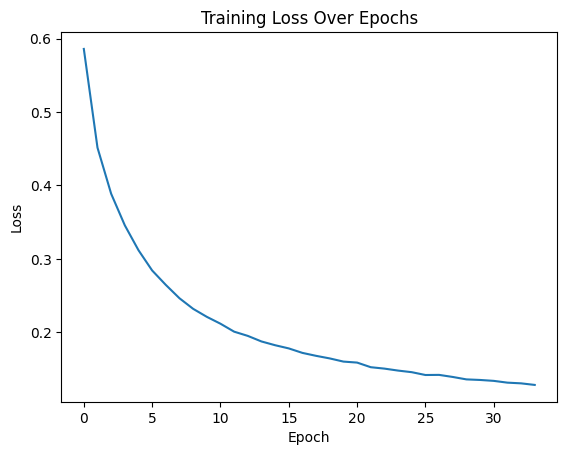

In [24]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        torch.save(model.state_dict(), 'checkpoint.pt')

early_stopping = EarlyStopping(patience=5, delta=0.01)


num_epochs = 50
losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(dataloader.dataset)
    losses.append(epoch_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')


    scheduler.step(epoch_loss)


    early_stopping(epoch_loss, model)
    if early_stopping.early_stop:
        print("Early stopping triggered.")
        break


plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

In [25]:
model.eval()
all_predictions = []
with torch.no_grad():
    for inputs, _ in dataloader:
        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()
        all_predictions.extend(predictions)

unique, counts = np.unique(all_predictions, return_counts=True)
print(f"Prediction distribution after training: {dict(zip(unique, counts))}")

Prediction distribution after training: {0: 39316, 1: 43998, 2: 43079}


In [26]:
class TradingEnvironmentWithTransformer:
    def __init__(self, data, daily_trading_limit=5000, window_size=60, stop_loss_pct=0.02, take_profit_pct=0.05):
        self.data = preprocess_data(data)
        self.daily_trading_limit = daily_trading_limit
        self.window_size = window_size
        self.stop_loss_pct = stop_loss_pct
        self.take_profit_pct = take_profit_pct
        self.state_columns = ['price', 'liquidity', 'RSI', 'pct_change', 'rolling_mean_vol', 'rolling_std_vol', 'rolling_mean_liq', 'rolling_std_liq', 'SMA_short', 'SMA_long', 'EMA_short', 'EMA_long']
        self.reset()

    def reset(self):
        self.current_step = 0
        self.balance = INITIAL_CASH
        self.shares_held = 0
        self.total_trades = 0
        self.cumulative_reward = 0
        self.trades = []
        self.done = False
        self.entry_price = 0
        self.highest_price = 0
        return self._get_observation()

    def _get_observation(self):
        return self.data.iloc[self.current_step:self.current_step + self.window_size][self.state_columns].values

    def step(self, action):
        row = self.data.iloc[self.current_step + self.window_size]
        current_price = row['price']

        shares_bought, shares_sold = 0, 0
        trade_direction = "HOLD"
        trade_price = current_price

        if action == 1:
            trade_direction = 'BUY'
            trade_price = get_trade_price(current_price, row['pct_change'], row['liquidity'], row['rolling_mean_vol'], row['rolling_std_vol'], row['rolling_mean_liq'], row['rolling_std_liq'], trade_direction)
            shares_bought = min(self.daily_trading_limit, self.balance // trade_price)
            if shares_bought > 0:
                self.balance -= shares_bought * trade_price
                self.shares_held += shares_bought
                self.entry_price = trade_price
                self.highest_price = trade_price
                self.total_trades += 1
                print(f"BUY: Price={trade_price}, Shares={shares_bought}")
        elif action == 2:
            trade_direction = 'SELL'
            trade_price = get_trade_price(current_price, row['pct_change'], row['liquidity'], row['rolling_mean_vol'], row['rolling_std_vol'], row['rolling_mean_liq'], row['rolling_std_liq'], trade_direction)
            shares_sold = min(self.daily_trading_limit, self.shares_held)
            if shares_sold > 0:
                self.balance += shares_sold * trade_price
                self.shares_held -= shares_sold
                self.total_trades += 1
                print(f"SELL: Price={trade_price}, Shares={shares_sold}")


        if self.shares_held > 0:
            self.highest_price = max(self.highest_price, current_price)
            trailing_stop_price = self.highest_price * (1 - self.stop_loss_pct)
            if current_price <= trailing_stop_price:
                shares_sold = self.shares_held
                self.balance += shares_sold * trailing_stop_price
                self.shares_held = 0
                trade_direction = 'TRAILING_STOP'
                trade_price = trailing_stop_price
                self.total_trades += 1
                print(f"TRAILING_STOP: Price={trailing_stop_price}, Shares={shares_sold}")


        if self.shares_held > 0:
            take_profit_price = self.entry_price * (1 + self.take_profit_pct)
            if current_price >= take_profit_price:
                shares_sold = self.shares_held
                self.balance += shares_sold * take_profit_price
                self.shares_held = 0
                trade_direction = 'TAKE_PROFIT'
                trade_price = take_profit_price
                self.total_trades += 1
                print(f"TAKE_PROFIT: Price={take_profit_price}, Shares={shares_sold}")

        if shares_bought > 0 or shares_sold > 0:
            expected_price = row['ask_px_00']
            actual_price = row['price']
            transaction_time = row['ts_in_delta']
            transaction_cost = self._calculate_transaction_cost(row['Volume'], 0.3, self.data['Volume'].mean())
            slippage = expected_price - actual_price
            time_penalty = 1000 * transaction_time / 1e9
            reward = - (slippage + time_penalty + transaction_cost)

            self.cumulative_reward += reward
            self.trades.append({
                'step': self.current_step,
                'timestamp': pd.to_datetime(row['ts_event']),
                'action': trade_direction,
                'price': trade_price,
                'shares': shares_bought if action == 1 else shares_sold,
                'symbol': row['symbol'],
                'reward': reward,
                'transaction_cost': transaction_cost,
                'slippage': slippage,
                'time_penalty': time_penalty
            })

        self.current_step += 1

        if self.current_step >= len(self.data) - self.window_size - 1:
            self.done = True

        reward = self.balance + self.shares_held * self.data.iloc[self.current_step + self.window_size]['price'] - INITIAL_CASH
        return self._get_observation(), reward, self.done, {}

    def _calculate_transaction_cost(self, volume, volatility, daily_volume):
        return volatility * np.sqrt(volume / daily_volume)

    def render(self):
        print(f"Step: {self.current_step}")
        print(f"Balance: {self.balance}")
        print(f"Shares held: {self.shares_held}")
        print(f"Total trades: {self.total_trades}")
        print(f"Total portfolio value: {self.balance + self.shares_held * self.data.iloc[self.current_step + self.window_size]['price']}")
        print(f"Cumulative reward: {self.cumulative_reward}")
        self.print_trades()

    def print_trades(self):
        trades_df = pd.DataFrame(self.trades)
        trades_df.to_csv('trades_transformer.csv', index=False)
        for trade in self.trades:
            print(f"Step: {trade['step']}, Timestamp: {trade['timestamp']}, Action: {trade['action']}, Price: {trade['price']}, Shares: {trade['shares']}, Reward: {trade['reward']}, Transaction Cost: {trade['transaction_cost']}, Slippage: {trade['slippage']}, Time Penalty: {trade['time_penalty']}")

In [27]:
model.load_state_dict(torch.load('checkpoint.pt'))
model.to(device)
model.eval()

ticker_data = data[data['symbol'] == 'AAPL']

env = TradingEnvironmentWithTransformer(ticker_data, daily_trading_limit=10000, window_size=60, stop_loss_pct=0.02, take_profit_pct=0.05)

obs = env.reset()
action_counts = {0: 0, 1: 0, 2: 0}

for step in range(len(ticker_data) - env.window_size - 1):
    obs_tensor = torch.tensor(obs, dtype=torch.float32).unsqueeze(0).to(device)
    with torch.no_grad():
        action_probs = model(obs_tensor)
        action = torch.argmax(action_probs, dim=1).item()
        action_counts[action] += 1
        obs, reward, done, _ = env.step(action)
        if done:
            break

env.render()

transformer_final_balance = env.balance + env.shares_held * env.data.iloc[-1]['price']
transformer_total_trades = env.total_trades
transformer_total_reward = env.cumulative_reward

BUY: Price=2.577376910132339, Shares=10000
TRAILING_STOP: Price=2.5258293719296923, Shares=10000
BUY: Price=1.7552426658251419, Shares=10000
BUY: Price=1.74036824139128, Shares=10000
BUY: Price=1.75822364615884, Shares=10000
BUY: Price=1.8200316547909348, Shares=10000
BUY: Price=1.9840168905409599, Shares=10000
TRAILING_STOP: Price=1.9443365527301406, Shares=50000
BUY: Price=1.9349029004709755, Shares=10000
TRAILING_STOP: Price=1.8962048424615559, Shares=10000
BUY: Price=2.0159979639452517, Shares=10000
TRAILING_STOP: Price=1.9756780046663467, Shares=10000
BUY: Price=1.8537386041952193, Shares=10000
BUY: Price=1.8727423781392114, Shares=10000
BUY: Price=1.8270283070703417, Shares=10000
BUY: Price=1.8323220610679645, Shares=10000
TAKE_PROFIT: Price=1.9239381641213629, Shares=40000
BUY: Price=1.4271492288222818, Shares=10000
BUY: Price=1.4301551391316072, Shares=10000
BUY: Price=1.5674277974226625, Shares=10000
TRAILING_STOP: Price=1.5360792414742093, Shares=30000
BUY: Price=1.5036986843

In [28]:
print(f"Transformer Strategy Final Portfolio Value: ${transformer_final_balance:,.2f}")
print(f"Transformer Strategy Total Trades: {transformer_total_trades}")
print(f"Transformer Strategy Total Reward: {transformer_total_reward}")

Transformer Strategy Final Portfolio Value: $10,045,883.05
Transformer Strategy Total Trades: 429
Transformer Strategy Total Reward: -63151.95981323728


## COMPARISON

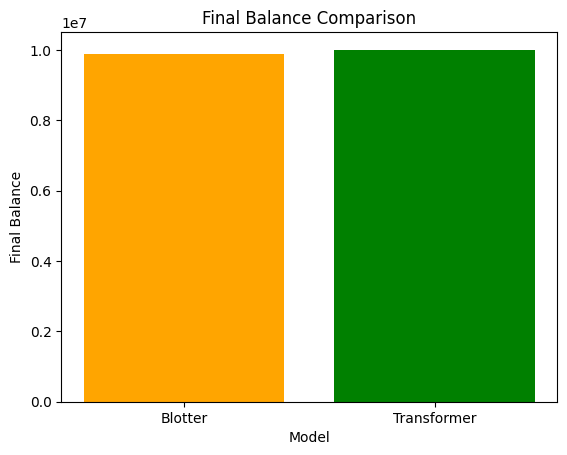

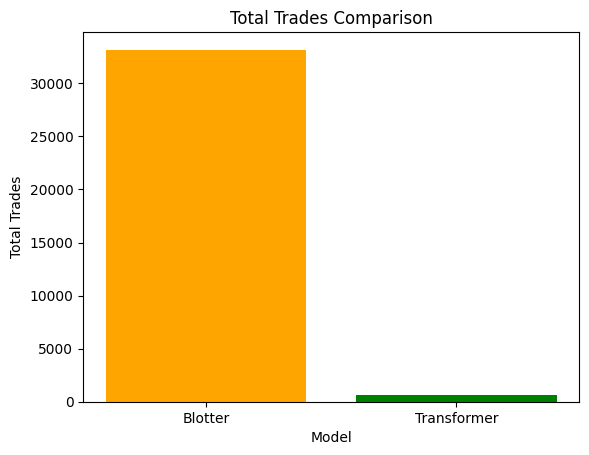

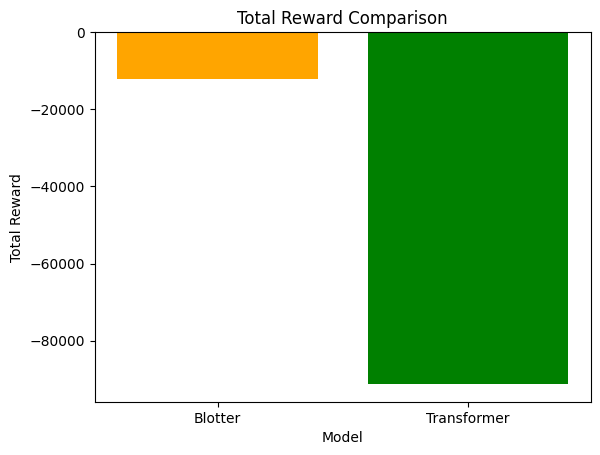

,Model,Final Balance,Total Trades,Total Reward
0,Blotter,9.876653e+06,33162,-12231.228876
1,Transformer,1.000736e+07,616,-91277.353315


In [ ]:
results = pd.DataFrame({
    "Model": ["Blotter", "Transformer"],
    "Final Balance": [blotter_final_balance, transformer_final_balance],
    "Total Trades": [blotter_total_trades, transformer_total_trades],
    "Total Reward": [blotter_total_reward, transformer_total_reward]
})


import matplotlib.pyplot as plt


plt.figure()
plt.bar(results["Model"], results["Final Balance"], color=['orange', 'green'])
plt.xlabel("Model")
plt.ylabel("Final Balance")
plt.title("Final Balance Comparison")
plt.show()


plt.figure()
plt.bar(results["Model"], results["Total Trades"], color=['orange', 'green'])
plt.xlabel("Model")
plt.ylabel("Total Trades")
plt.title("Total Trades Comparison")
plt.show()


plt.figure()
plt.bar(results["Model"], results["Total Reward"], color=['orange', 'green'])
plt.xlabel("Model")
plt.ylabel("Total Reward")
plt.title("Total Reward Comparison")
plt.show()

results